In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
from multiprocessing import Pool

# Load the Netflix Titles dataset
netflix_data = pd.read_csv('netflix_titles.csv', encoding='latin-1')

C:\Users\Steven Nguyen\AppData\Local\Temp\ipykernel_19080\1785630898.py:18: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


<Figure size 1200x800 with 0 Axes>

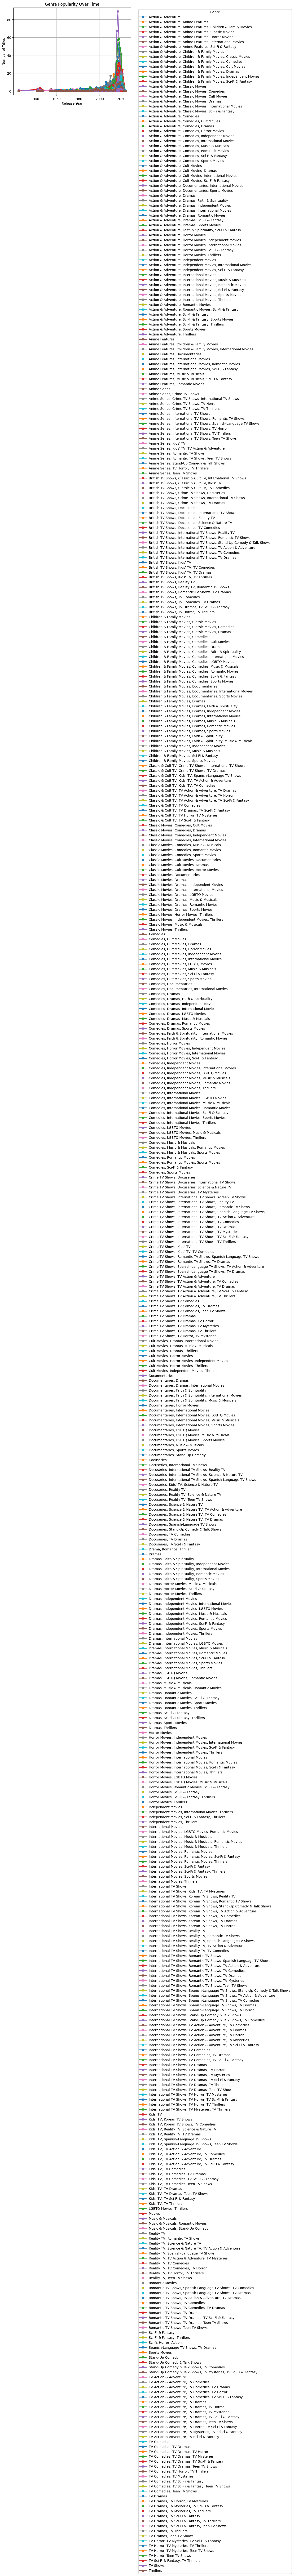

In [5]:
#Genre Popularity Over Time
import matplotlib.pyplot as plt

# Group by release year and genre, then count occurrences
genre_counts = netflix_data.groupby(['release_year', 'listed_in']).size().reset_index(name='count')

# Pivot the table to have release year as index and genres as columns
genre_counts_pivot = genre_counts.pivot(index='release_year', columns='listed_in', values='count').fillna(0)

# Plotting genre popularity over time
plt.figure(figsize=(12, 8))
genre_counts_pivot.plot(kind='line', marker='o', linewidth=2)
plt.title('Genre Popularity Over Time')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


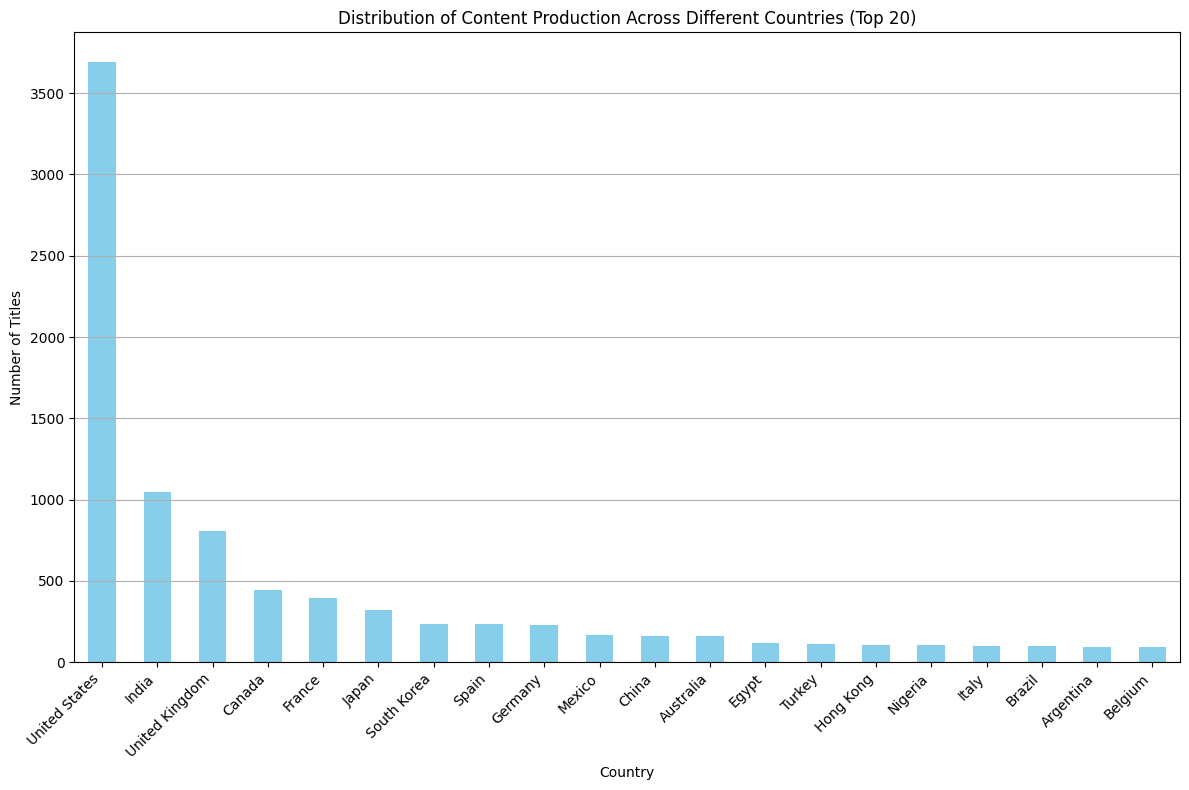

In [6]:
# Distribution of Content Production Across Different Countries:

# Split countries and explode to get individual countries
netflix_data['country'] = netflix_data['country'].str.split(', ')
country_counts = netflix_data.explode('country')['country'].value_counts()

# Plotting distribution of content production across different countries
plt.figure(figsize=(12, 8))
country_counts.head(20).plot(kind='bar', color='skyblue')
plt.title('Distribution of Content Production Across Different Countries (Top 20)')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

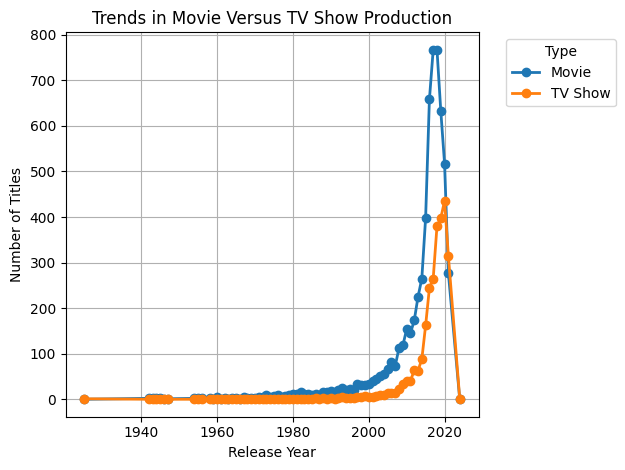

In [7]:
#Trends in Movie Versus TV Show Production:

# Group by release year and type (Movie/TV Show), then count occurrences
type_counts = netflix_data.groupby(['release_year', 'type']).size().unstack(fill_value=0)

# Plotting trends in movie versus TV show production
plt.figure(figsize=(12, 8))
type_counts.plot(kind='line', marker='o', linewidth=2)
plt.title('Trends in Movie Versus TV Show Production')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.legend(title='Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()